In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv('data/kc_house_data.csv')

In [21]:
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [22]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

<AxesSubplot:>

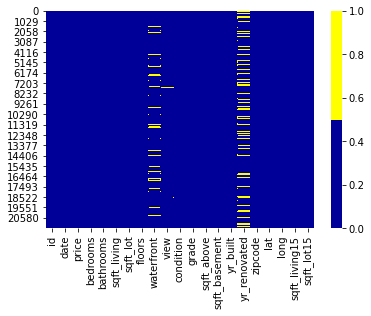

In [23]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [24]:

# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
date - 0.0%
price - 0.0%
bedrooms - 0.0%
bathrooms - 0.0%
sqft_living - 0.0%
sqft_lot - 0.0%
floors - 0.0%
waterfront - 11.0%
view - 0.0%
condition - 0.0%
grade - 0.0%
sqft_above - 0.0%
sqft_basement - 0.0%
yr_built - 0.0%
yr_renovated - 18.0%
zipcode - 0.0%
lat - 0.0%
long - 0.0%
sqft_living15 - 0.0%
sqft_lot15 - 0.0%


In [25]:
# Adding Binary Column for Basement
df['sqft_basement'].replace(to_replace='?', value='0', inplace=True)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'],errors='coerce')
df['has_basement'] = df['sqft_basement']
df.loc[df.has_basement > 0, 'has_basement'] = 1

In [26]:
# Converting to Datetime
df['date'] =  pd.to_datetime(df['date'], format='%m/%d/%Y')

In [27]:
# Converting Waterfront to Binary
df['waterfront'] = df['waterfront'].fillna('0')
df['waterfront'].replace(to_replace='NO', value='0', inplace=True)
df['waterfront'].replace(to_replace='YES', value='1', inplace=True)
df['waterfront'] = pd.to_numeric(df['waterfront'],errors='coerce')

In [28]:
df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [29]:
# Converting Grade to Numeric
df['grade'] = df['grade'].str.slice(0,2).str.strip()
df['grade'] = pd.to_numeric(df['grade'],errors='coerce')

In [30]:
# Creating Column for Renovations within last 10 years
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)
df['renovated_less_10yrs'] = df['yr_renovated'] > 2010.0
df['renovated_less_10yrs'] = df['renovated_less_10yrs'].astype('int64')
df['renovated_less_10yrs'].value_counts()

0    21462
1      135
Name: renovated_less_10yrs, dtype: int64

In [31]:
# Converting condition to numeric
df['condition'].replace('Poor', '1', inplace=True)
df['condition'].replace('Fair', '2', inplace=True)
df['condition'].replace('Average', '3', inplace=True)
df['condition'].replace('Good', '4', inplace=True)
df['condition'].replace('Very Good', '5', inplace=True)
df['condition'] = df['condition'].astype(np.int64)

In [32]:
# Converting View to Numeric
df['view'].fillna('NONE', inplace=True)
df['view'].replace('NONE', '0', inplace=True)
df['view'].replace('FAIR', '1', inplace=True)
df['view'].replace('AVERAGE', '2', inplace=True)
df['view'].replace('GOOD', '3', inplace=True)
df['view'].replace('EXCELLENT', '4', inplace=True)
df['view'] = df['view'].astype(np.int64)

In [33]:
df.shape

(21597, 23)

###DROPPING OUTLIERS

In [34]:
price_mean = np.mean(df['price'])
cut_off = np.std(df['price']) * 3
df.drop(df[df['price'] > price_mean + cut_off].index, inplace = True)
df.drop(df[df['price'] < price_mean - cut_off].index, inplace = True)
df.drop(df[df['bedrooms'] > 15].index, inplace=True)


In [35]:
df.shape

(21190, 23)

C:\Users\chris\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

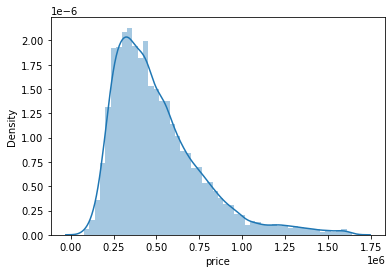

In [36]:
sns.distplot(df['price'])

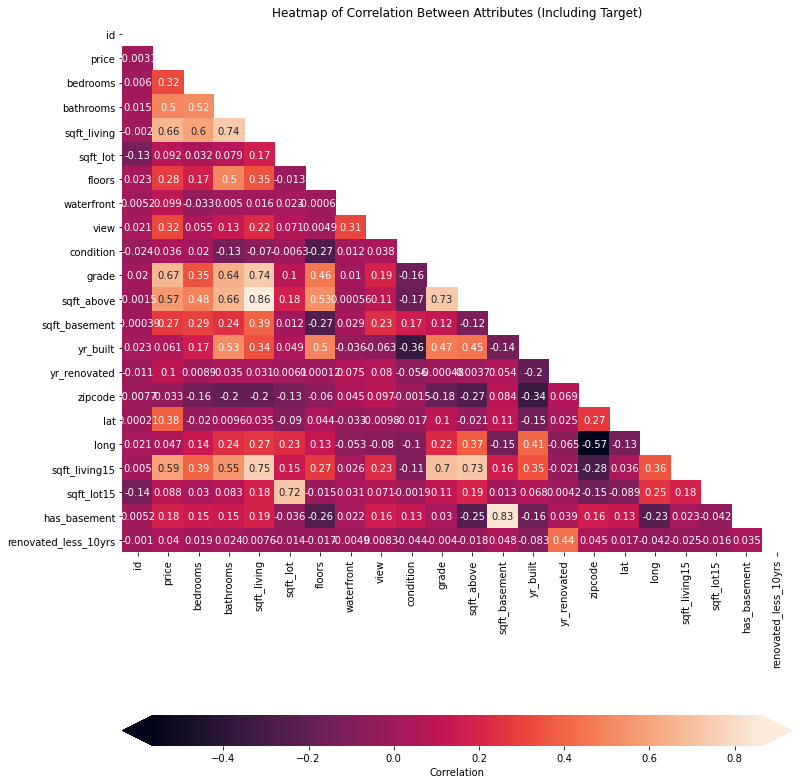

In [37]:
# Create a df with the target as the first column,
# then compute the correlation matrix
corr = df.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [38]:
df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)


df_corr.rename(columns={0 : 'corr'}, inplace=True)
df_corr[(df_corr['corr'] > .6) & (df_corr['corr'] < 1) & df_corr['level_0'] == 'price']

Empty DataFrame
Columns: [level_0, level_1, corr]
Index: []

In [39]:
other_cols = df.columns.drop(['price', 'date'])
formula = 'price ~ + {}'.format(' + '.join(other_cols))
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     2510.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:46:51   Log-Likelihood:            -2.8099e+05
No. Observations:               21190   AIC:                         5.620e+05
Df Residuals:                   21168   BIC:                         5.622e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.558e+06   2.06e+06     -0.758      0.449   -5.59e+06    2.47e+06
id                   -5.893e-07   3.36e-07     -1.752      0.080   -1.25e-06    7.01e-08
bedrooms              -1.55e+04   1402.731    -11.053      0.000   -1.83e+04   -1.28e+04
bathrooms             2.728e+04   2331.256     11.704      0.000    2.27e+04    3.19e+04
sqft_living             78.3938     12.904      6.075      0.000      53.100     103.688
sqft_lot                 0.1793      0.034      5.227      0.000       0.112       0.246
floors                3.188e+04   2541.939     12.543      0.000    2.69e+04    3.69e+04
waterfront             2.08e+05   1.64e+04     12.655      0.000    1.76e+05     2.4e+05
view                  4.222e+04   1537.684     27.456      0.000    3.92e+04    4.52e+04
condition             2.835e+04   1639.850     17.285      0.000    2.51e+04    3.16e+04
grade                 8.698e+04   1531.392     56.796      0.000     8.4e+04       9e+04
sqft_above              17.5054     12.865      1.361      0.174      -7.710      42.721
sqft_basement           -7.5746     13.378     -0.566      0.571     -33.797      18.648
yr_built             -2138.9798     50.671    -42.213      0.000   -2238.300   -2039.660
yr_renovated            16.4395      3.128      5.256      0.000      10.309      22.570
zipcode               -355.4185     23.092    -15.392      0.000    -400.680    -310.157
lat                   5.673e+05   7456.258     76.079      0.000    5.53e+05    5.82e+05
long                 -1.068e+05   9202.202    -11.605      0.000   -1.25e+05   -8.88e+04
sqft_living15           48.0582      2.506     19.177      0.000      43.146      52.970
sqft_lot15              -0.1722      0.051     -3.346      0.001      -0.273      -0.071
has_basement          2.278e+04   3782.682      6.023      0.000    1.54e+04    3.02e+04
renovated_less_10yrs  3.767e+04   1.35e+04      2.796      0.005    1.13e+04    6.41e+04
==============================================================================
Omnibus:                     4785.036   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18513.573
Skew:                           1.085   Prob(JB):                         0.00
Kurtosis:                       7.032   Cond. No.                     1.17e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

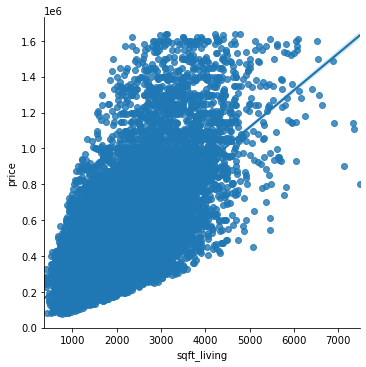

In [40]:

sns.lmplot(x='sqft_living', y='price', data=df)  

In [41]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


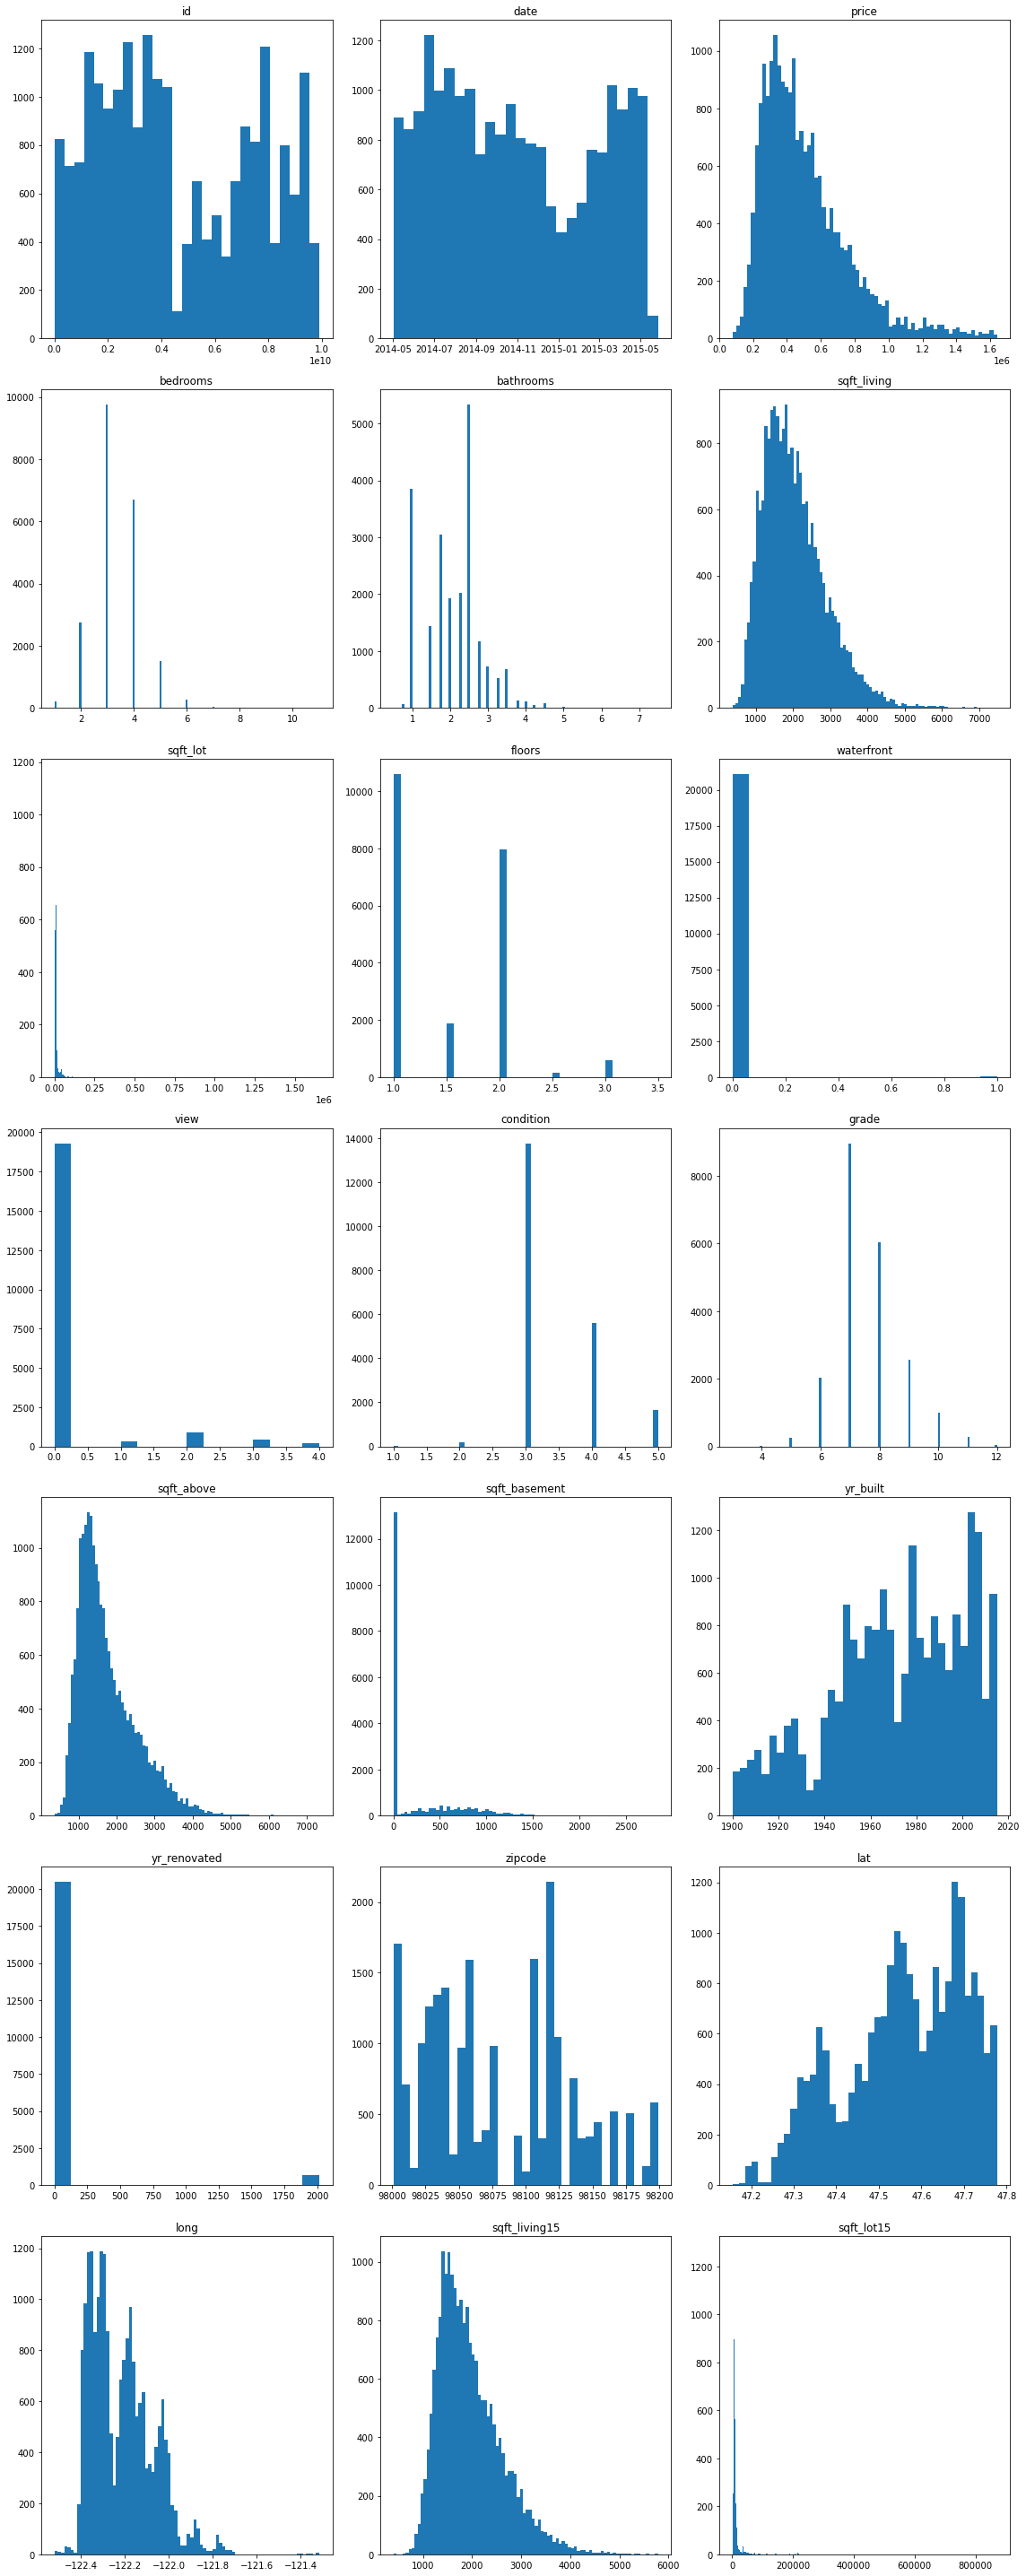

In [42]:
fig, axes = plt.subplots(nrows=(df.shape[1] // 3), ncols=3, figsize=(16,40))

columns = df.columns

for col, ax in zip(columns, axes.flatten()):
    ax.hist(df[col].dropna(), bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

In [43]:
df.corr()

id     price  bedrooms  bathrooms  sqft_living  \
id                    1.000000 -0.003088  0.006001   0.014560    -0.001958   
price                -0.003088  1.000000  0.318745   0.495675     0.664626   
bedrooms              0.006001  0.318745  1.000000   0.517370     0.598567   
bathrooms             0.014560  0.495675  0.517370   1.000000     0.735673   
sqft_living          -0.001958  0.664626  0.598567   0.735673     1.000000   
sqft_lot             -0.132582  0.091610  0.031840   0.078987     0.169519   
floors                0.023273  0.277962  0.172777   0.504537     0.349647   
waterfront            0.005240  0.098977 -0.033008   0.004964     0.015634   
view                  0.021090  0.316777  0.055165   0.134630     0.218948   
condition            -0.024123  0.036180  0.020216  -0.134420    -0.070026   
grade                 0.020122  0.672413  0.348937   0.640272     0.738144   
sqft_above           -0.001537  0.566704  0.484375   0.660090     0.863153   
sqft_basement        -0.000393  0.274630  0.291821   0.243847     0.393207   
yr_built              0.023014  0.060512  0.165069   0.527974     0.342927   
yr_renovated         -0.011242  0.100038  0.008932   0.034553     0.031077   
zipcode              -0.007705 -0.032632 -0.155537  -0.203148    -0.201286   
lat                   0.000213  0.384495 -0.020221   0.009617     0.034624   
long                  0.020990  0.046542  0.141942   0.239475     0.268985   
sqft_living15         0.005036  0.594993  0.392061   0.549323     0.751784   
sqft_lot15           -0.138807  0.088080  0.030064   0.082588     0.184981   
has_basement          0.005155  0.178507  0.152822   0.147023     0.187795   
renovated_less_10yrs -0.001029  0.040401  0.018585   0.024241     0.007641   

                      sqft_lot    floors  waterfront      view  condition  \
id                   -0.132582  0.023273    0.005240  0.021090  -0.024123   
price                 0.091610  0.277962    0.098977  0.316777   0.036180   
bedrooms              0.031840  0.172777   -0.033008  0.055165   0.020216   
bathrooms             0.078987  0.504537    0.004964  0.134630  -0.134420   
sqft_living           0.169519  0.349647    0.015634  0.218948  -0.070026   
sqft_lot              1.000000 -0.012959    0.022897  0.070874  -0.006337   
floors               -0.012959  1.000000   -0.000644  0.004891  -0.270735   
waterfront            0.022897 -0.000644    1.000000  0.305590   0.012290   
view                  0.070874  0.004891    0.305590  1.000000   0.038374   
condition            -0.006337 -0.270735    0.012290  0.038374   1.000000   
grade                 0.103225  0.457392    0.010113  0.190947  -0.160317   
sqft_above            0.177116  0.528588    0.000560  0.106213  -0.172070   
sqft_basement         0.011613 -0.268051    0.028794  0.233342   0.169126   
yr_built              0.048918  0.498488   -0.036346 -0.062927  -0.357553   
yr_renovated          0.006090  0.000118    0.074859  0.080257  -0.055921   
zipcode              -0.130779 -0.060120    0.044967  0.097030  -0.001520   
lat                  -0.090094  0.044307   -0.032741 -0.009773  -0.016836   
long                  0.227292  0.129954   -0.053369 -0.079595  -0.103527   
sqft_living15         0.145267  0.272506    0.025519  0.231977  -0.106914   
sqft_lot15            0.719154 -0.014902    0.030614  0.070661  -0.001927   
has_basement         -0.036157 -0.263395    0.021549  0.162051   0.127244   
renovated_less_10yrs -0.014306 -0.017490   -0.004892  0.008259  -0.044448   

                      ...  sqft_basement  yr_built  yr_renovated   zipcode  \
id                    ...      -0.000393  0.023014     -0.011242 -0.007705   
price                 ...       0.274630  0.060512      0.100038 -0.032632   
bedrooms              ...       0.291821  0.165069      0.008932 -0.155537   
bathrooms             ...       0.243847  0.527974      0.034553 -0.203148   
sqft_living           ...       0.393207  0.342927      0.031077 -0.201

In [44]:
# Define X and y
X = df.drop(columns='price')
y = df['price']

In [45]:
# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [47]:
# Make a train df so we can see X versus y in our train data
train_df = pd.concat([X_train, y_train], axis=1)

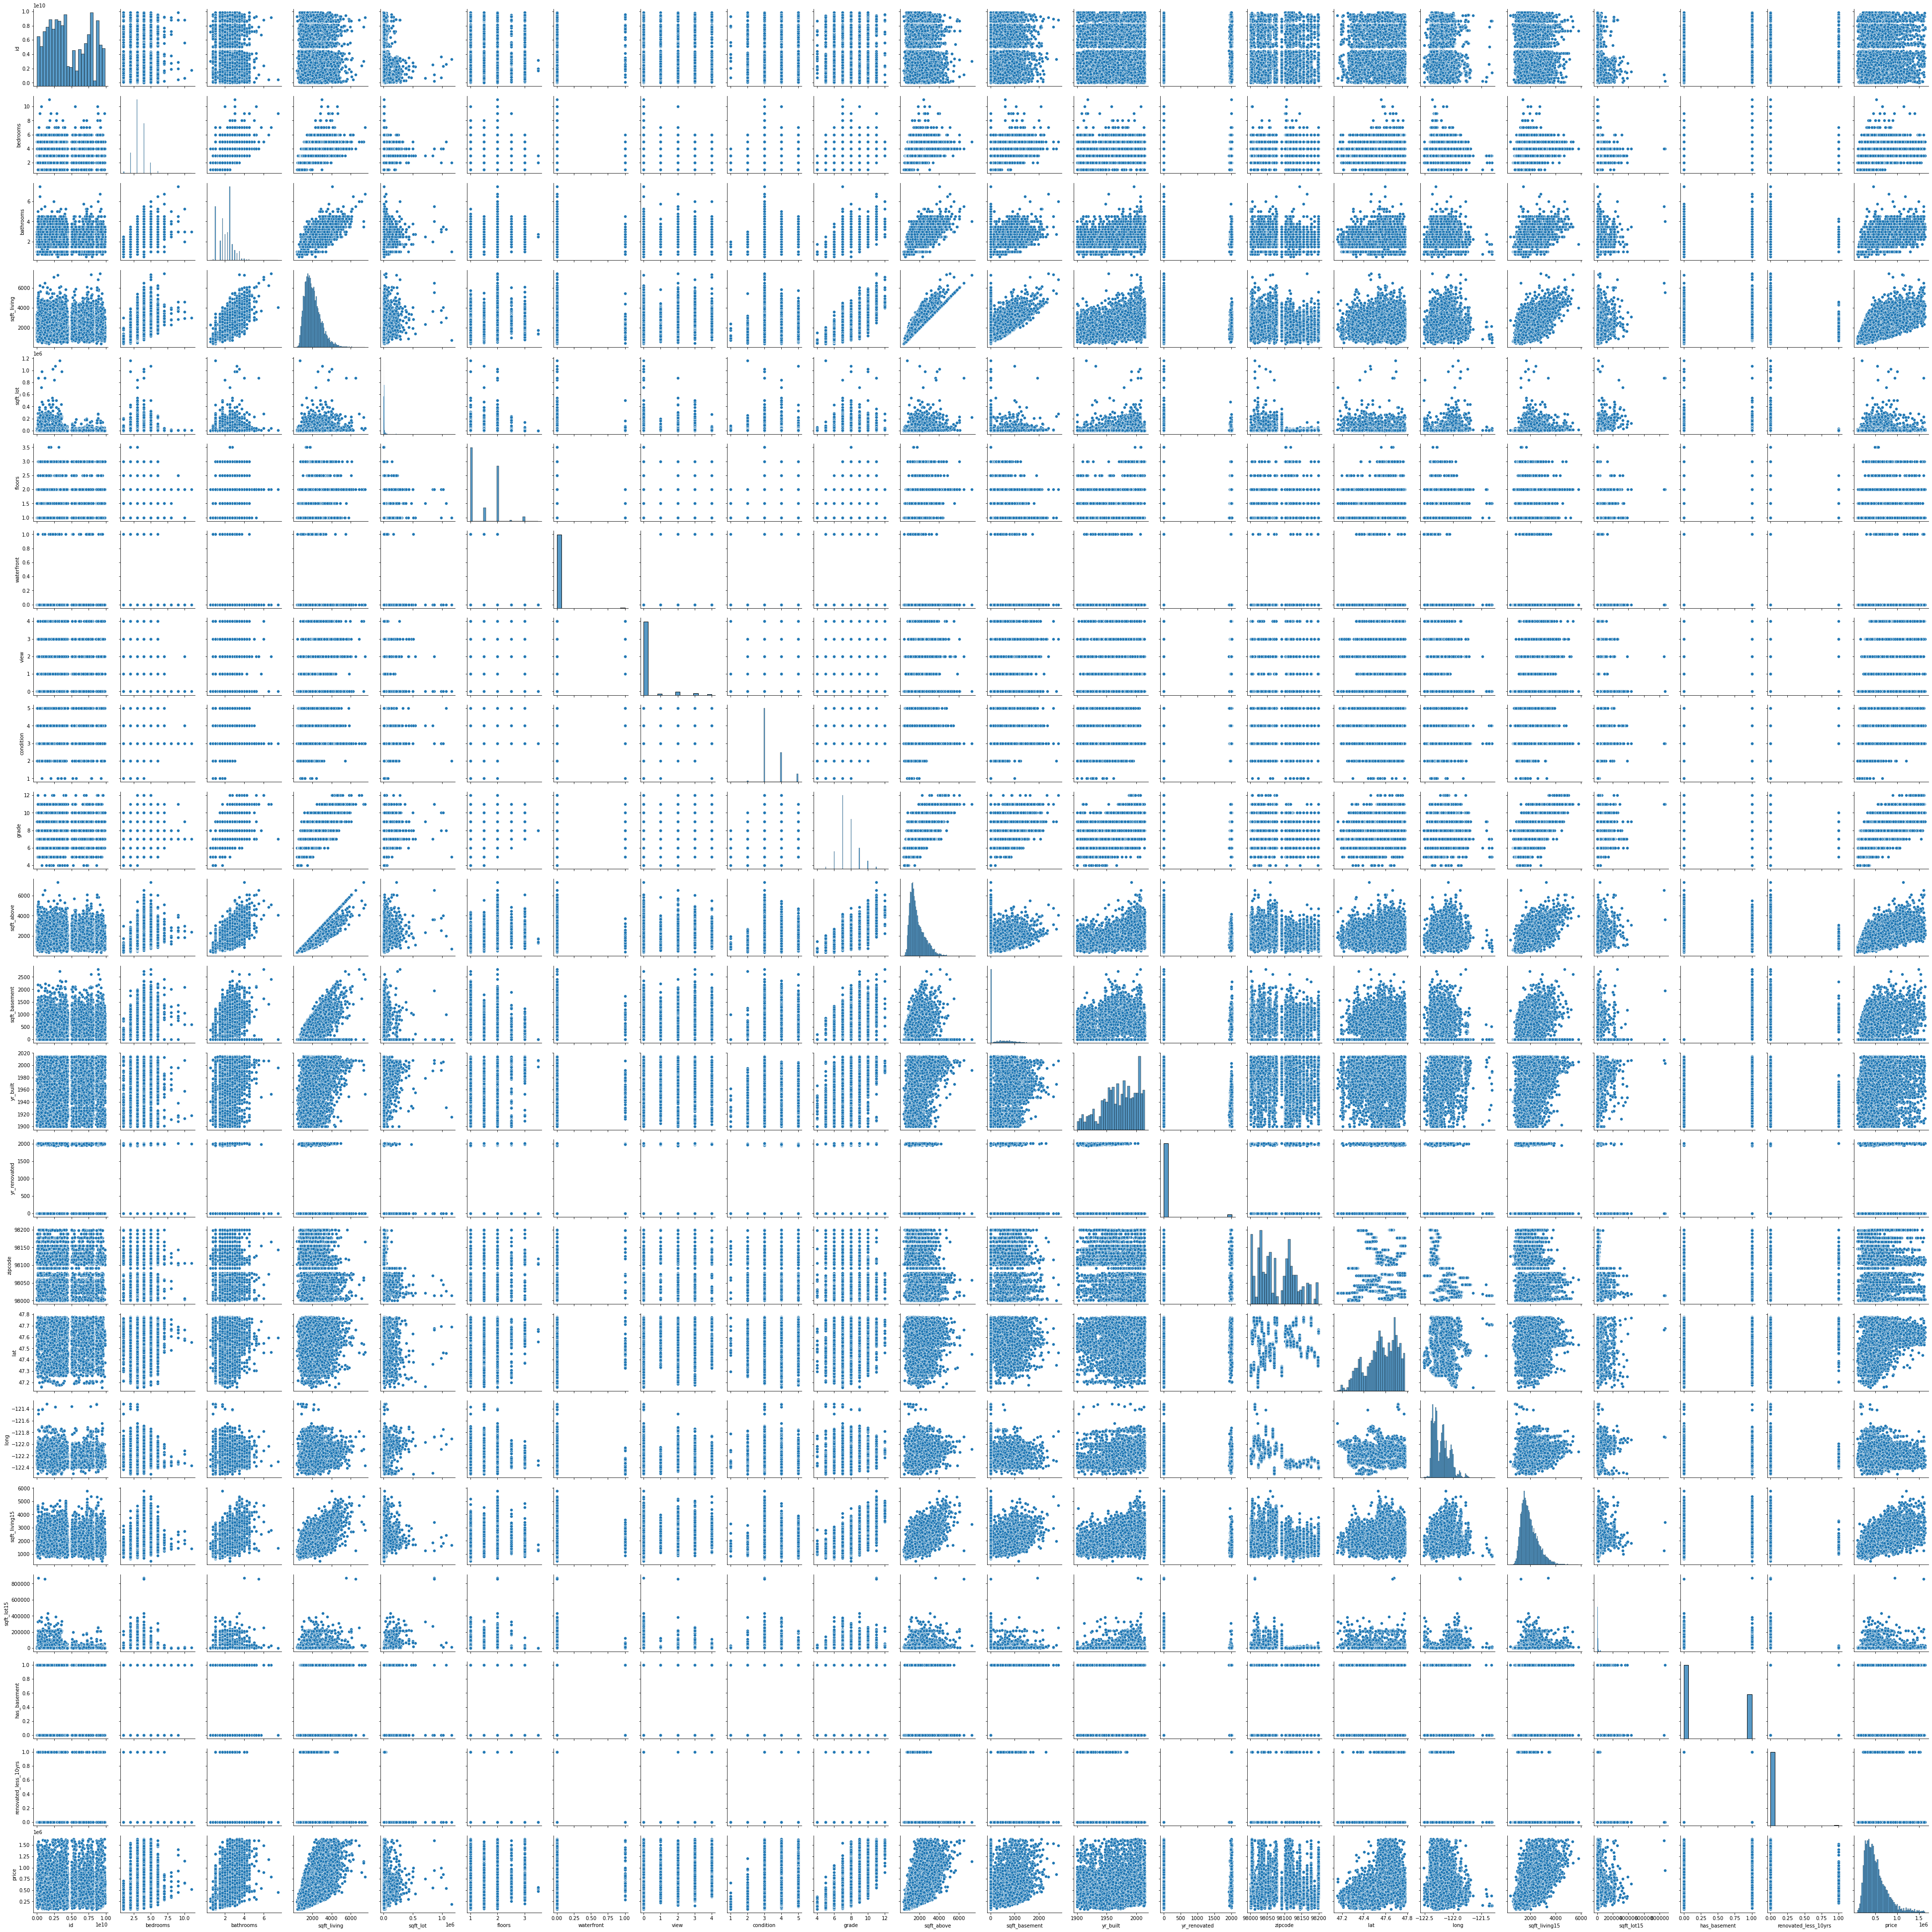

In [48]:
sns.pairplot(train_df)
plt.show()

In [50]:
# check all correlations using the same Pearson's correlation coefficient
train_df.corr()['price']

id                      0.002624
bedrooms                0.314821
bathrooms               0.495038
sqft_living             0.665373
sqft_lot                0.097018
floors                  0.277909
waterfront              0.087413
view                    0.323699
condition               0.034051
grade                   0.675138
sqft_above              0.567167
sqft_basement           0.276371
yr_built                0.067467
yr_renovated            0.097215
zipcode                -0.039995
lat                     0.382924
long                    0.048439
sqft_living15           0.593831
sqft_lot15              0.092153
has_basement            0.180803
renovated_less_10yrs    0.043690
price                   1.000000
Name: price, dtype: float64